## 1\. 시계열 데이터의 이해와 정상성 (Understanding Time Series & Stationarity)

### 💡 개념 (Concept)

\*\*시계열 데이터(Time Series Data)\*\*란 일정 시간 간격으로 측정된 데이터의 순차적인 집합을 의미합니다. 주식 가격, 월별 강수량, 일일 웹사이트 방문자 수 등이 모두 시계열 데이터의 예입니다.

시계열 분석의 핵심 목표는 데이터에 숨겨진 패턴을 발견하고 이를 바탕으로 미래 값을 예측하는 것입니다. 대부분의 시계열 예측 모델은 데이터가 \*\*정상성(Stationarity)\*\*을 갖는다고 가정합니다.

**정상성이란?**
시간이 흘러도 데이터의 통계적 특성(평균, 분산 등)이 변하지 않는 상태를 의미합니다. 즉, 시계열 데이터의 분포가 시간에 따라 일정해야 합니다.

  * **왜 정상성이 중요한가?**: 데이터의 패턴이 시간과 관계없이 일정해야 과거의 패턴을 기반으로 미래를 안정적으로 예측할 수 있기 때문입니다.
  * **비정상 데이터**: 주가처럼 지속적으로 상승하는 추세(Trend)가 있거나, 아이스크림 판매량처럼 계절에 따라 주기적으로 변동하는 계절성(Seasonality)이 있는 데이터는 비정상 시계열입니다.

**정상성 확인 방법: ADF 검정 (Augmented Dickey-Fuller Test)**
ADF 검정은 시계열 데이터의 정상성을 통계적으로 확인하는 대표적인 방법입니다. 가설은 다음과 같습니다.

  * **귀무가설(Null Hypothesis)**: 데이터에 단위근(unit root)이 존재한다. (즉, 비정상 시계열이다)
  * **대립가설(Alternative Hypothesis)**: 데이터가 정상성을 만족한다.

검정 결과로 나오는 **p-value**가 특정 유의수준(보통 0.05)보다 작으면 귀무가설을 기각하고, 데이터가 정상성을 갖는다고 판단할 수 있습니다.

**비정상 데이터를 정상 데이터로 변환하기: 차분 (Differencing)**
대부분의 비정상 시계열은 **차분**을 통해 정상성을 만족하는 데이터로 변환할 수 있습니다. 차분은 현재 시점의 데이터에서 바로 이전 시점의 데이터를 빼주는 간단한 과정입니다. 이를 통해 데이터의 추세를 제거하는 효과를 얻을 수 있습니다.

$$Y'_t = Y_t - Y_{t-1}$$

### 💻 예시 코드 (Example Code)

항공 승객 수 데이터를 활용하여 시계열 데이터의 특징을 시각화하고, ADF 검정과 차분을 실습해 보겠습니다.

In [1]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

# 1. 데이터 로드 및 시각화
# 웹에서 바로 데이터를 불러옵니다.
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=True)
df.columns = ['Passengers']

# 시계열 데이터 플롯
fig = px.line(df, x=df.index, y='Passengers', title='월별 항공 승객 수 (1949-1960)')
fig.show()

# 2. ADF 검정 함수 정의 및 정상성 확인
def adf_test(series, name=''):
    """주어진 시계열에 대해 ADF 검정을 수행하고 결과를 출력합니다."""
    print(f'>>> {name} ADF Test <<<')
    result = adfuller(series.dropna()) # NaN 값을 제외하고 검정 수행
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print("=> p-value가 0.05보다 작으므로, 귀무가설을 기각합니다. 데이터는 정상성을 만족합니다.\n")
    else:
        print("=> p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 데이터는 비정상 시계열입니다.\n")

# 원본 데이터에 대한 ADF 검정
adf_test(df['Passengers'], name='Original')

# 3. 1차 차분을 통한 정상성 확보
df['Passengers_diff'] = df['Passengers'].diff()

# 1차 차분 데이터 플롯
fig_diff = px.line(df, x=df.index, y='Passengers_diff', title='1차 차분된 항공 승객 수')
fig_diff.show()

# 1차 차분 데이터에 대한 ADF 검정
adf_test(df['Passengers_diff'], name='1st Differenced')

>>> Original ADF Test <<<
ADF Test Statistic : 0.8153688792060352
p-value : 0.9918802434376408
#Lags Used : 13
Number of Observations Used : 130
=> p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 데이터는 비정상 시계열입니다.



>>> 1st Differenced ADF Test <<<
ADF Test Statistic : -2.8292668241699945
p-value : 0.05421329028382621
#Lags Used : 12
Number of Observations Used : 130
=> p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 데이터는 비정상 시계열입니다.



In [2]:
import pandas as pd
url = "https://fred.stlouisfed.org/data/NATURALGAS.txt"
df = pd.read_html(url)
df_gas = df[1]
df_gas.columns = ['Month', 'Natural Gas Sales']
df_gas['Month'] = pd.to_datetime(df_gas['Month'])
df_gas.set_index('Month', inplace=True)

fig = px.line(df_gas, x=df_gas.index, y='Natural Gas Sales', title='미국 월별 천연가스 판매량 시계열')
fig.show()

### ✏️ 연습 문제 (Practice Problems)

1.  미국 월별 천연가스 판매량 데이터를 불러와 시계열 그래프로 시각화하고, 데이터의 특징(추세, 계절성)을 설명해보세요.
      * 데이터셋 URL: `https://fred.stlouisfed.org/data/NATURALGAS.txt`
2.  위 데이터에 대해 ADF 검정을 수행하고 정상성을 만족하는지 확인하세요.
3.  데이터가 비정상 시계열이라면, 정상성을 만족할 때까지 차분을 수행하고, 매 차분 단계마다 ADF 검정 결과와 시계열 그래프를 확인하여 비교 설명하세요.

>>>  ADF Test <<<
ADF Test Statistic : 0.7019009774398367
p-value : 0.9898757305970791
#Lags Used : 14
Number of Observations Used : 288
=> p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 데이터는 비정상 시계열입니다.

>>>  ADF Test <<<
ADF Test Statistic : -6.294503859155284
p-value : 3.53286850425418e-08
#Lags Used : 13
Number of Observations Used : 288
=> p-value가 0.05보다 작으므로, 귀무가설을 기각합니다. 데이터는 정상성을 만족합니다.



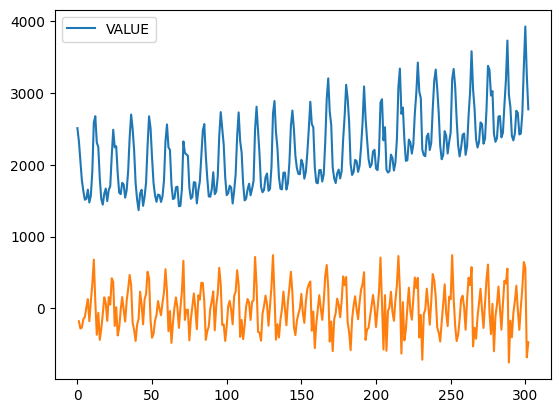

In [3]:
# 연습 문제 1, 2, 3번 풀이 공간
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

# 1. 데이터 로드 및 시각화
url = "https://fred.stlouisfed.org/data/NATURALGAS.txt"
dfs = pd.read_html(url)
df_gas = dfs[1]

# 여기에 코드를 작성하여 시각화 및 특징을 설명하세요.
df_gas.plot()

# 2. ADF 검정 수행
# 여기에 코드를 작성하여 원본 데이터의 정상성을 확인하세요.
adf_test(df_gas['VALUE'])

# 3. 차분 및 정상성 확보
# 여기에 코드를 작성하여 차분을 적용하고 정상성을 확인하세요.
df_gas_diff = df_gas['VALUE'].diff()
df_gas_diff.plot()
adf_test(df_gas_diff)

-----

## 2\. 단변량 시계열 분석 (Univariate Analysis): ARIMA

### 💡 개념 (Concept)

**ARIMA(AutoRegressive Integrated Moving Average)** 모델은 가장 대표적인 단변량 시계열 예측 모델입니다. 즉, 하나의 변수(y)의 과거 데이터 패턴과 오차를 학습하여 미래 값을 예측합니다. ARIMA는 세 가지 핵심 요소로 구성됩니다.

  * **AR (AutoRegressive, 자기회귀)**: **과거의 값**이 현재의 값에 영향을 미친다는 아이디어에 기반합니다.

      * `p`는 참고할 과거 시점의 개수를 의미합니다. (예: `p=3`이면 3개월 전 데이터까지 참고)
      * 메타포: "이번 달 매출은 지난달과 지지난달 매출과 비슷할 거야."
        $$Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + \epsilon_t$$

  * **I (Integrated, 통합)**: 비정상 시계열을 정상 시계열로 만들기 위해 필요한 **차분 횟수**를 의미합니다.

      * `d`는 차분을 적용한 횟수를 나타냅니다. (d=1이면 1차 차분)

  * **MA (Moving Average, 이동평균)**: **과거의 예측 오차**가 현재의 값에 영향을 미친다는 개념입니다.

      * `q`는 참고할 과거 예측 오차의 개수를 의미합니다.
      * 메타포: "지난달 매출 예측이 빗나갔으니, 그 오차를 반영해서 이번 달 예측을 보정해야 해."
        $$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$$

**ACF와 PACF: p와 q 정하기**
ARIMA 모델의 차수 `p`와 `q`를 결정하기 위해 \*\*ACF(자기상관함수)\*\*와 **PACF(부분자기상관함수)** 플롯을 활용합니다.

  * **ACF (Autocorrelation Function)**: 시점 t의 데이터와 그 이전 시점들(t-1, t-2, ...)의 데이터 간의 상관관계를 보여줍니다. **MA 모델의 차수 q를 결정**하는 데 사용됩니다.
  * **PACF (Partial Autocorrelation Function)**: 다른 시점들의 영향을 제외하고, 오직 두 시점(t와 t-k)의 데이터 간 순수한 상관관계를 보여줍니다. **AR 모델의 차수 p를 결정**하는 데 사용됩니다.

| 모델 | ACF 플롯 특징 | PACF 플롯 특징 |
| :--- | :--- | :--- |
| **AR(p)** | 점차 감소하며 0에 수렴 | `p` 시점 이후 급격히 0으로 절단 |
| **MA(q)** | `q` 시점 이후 급격히 0으로 절단 | 점차 감소하며 0에 수렴 |

### 💻 예시 코드 (Example Code)

이번에는 `moneystock-spending-series.csv` 데이터셋을 사용하여 ARIMA 모델을 구축하고 예측을 수행합니다. 이 데이터는 M2 통화량과 개인 소비 지출 데이터로 구성되어 있습니다.

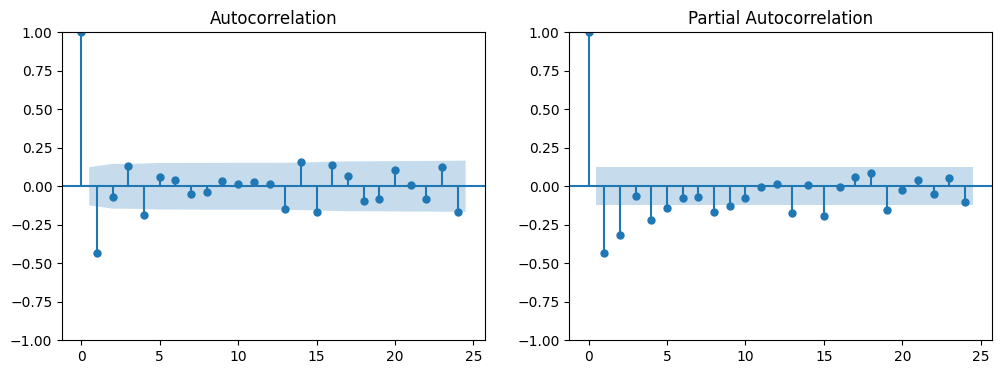

                               SARIMAX Results                                
Dep. Variable:                  Money   No. Observations:                  252
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1176.729
Date:                Tue, 10 Jun 2025   AIC                           2359.458
Time:                        17:06:26   BIC                           2370.023
Sample:                    01-01-1995   HQIC                          2363.710
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.042      5.297      0.000       0.140       0.305
ma.L1         -0.9481      0.021    -45.132      0.000      -0.989      -0.907
sigma2       712.5495     33.501     21.270      0.0

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 데이터 로드 (money stock spending)
df_money = pd.read_csv('../datasets/tsa/moneystock-spending-series.csv', index_col=0, parse_dates=True)
df_money.index.freq = 'MS' # 월별 데이터 주파수 설정

# 'Money' 변수에 대해 분석 진행
money_series = df_money['Money']

# 1. 정상성 확인 및 차분
# ADF 검정 결과 p-value가 1.0으로 비정상 시계열임 (위에서 실습)
# 2차 차분을 통해 정상성 확보
money_diff2 = money_series.diff().diff().dropna()
# adf_test(money_diff2) # p-value가 매우 작게 나와 정상성 만족

# 2. ACF, PACF 플롯으로 p, q 추정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(money_diff2, ax=ax1)
plot_pacf(money_diff2, ax=ax2)
plt.show()
# PACF 플롯을 보면 lag 1 이후에 값이 급격히 감소하므로 p=1로 추정 가능
# ACF 플롯을 보면 lag 1 이후에 값이 급격히 감소하므로 q=1로 추정 가능

# 3. ARIMA(1, 2, 1) 모델 구축 및 학습
# p=1, d=2(2차 차분), q=1
model = ARIMA(money_series, order=(1, 2, 1))
fitted_model = model.fit()
print(fitted_model.summary())

# 4. 예측 및 시각화
# 학습 데이터 분할 (마지막 12개월을 테스트 데이터로)
train_data = money_series[:-12]
test_data = money_series[-12:]

# ARIMA(1, 2, 1) 모델 재학습
model_train = ARIMA(train_data, order=(1, 2, 1))
fitted_train_model = model_train.fit()

# 예측 (12개월)
forecast = fitted_train_model.forecast(steps=12)

# 결과 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, name='Train'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, name='Test'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast, name='Forecast'))
fig.update_layout(title='M2 통화량: 실제값 vs 예측값 (ARIMA)', xaxis_title='날짜', yaxis_title='통화량')
fig.show()

### ✏️ 연습 문제 (Practice Problems)

1.  미국 월별 주택 판매량 데이터를 사용하여 미래 12개월을 예측하는 ARIMA 모델을 만들어보세요.
      * 데이터셋 경로: `datasets/tsa/HOUST.csv`
2.  데이터를 로드하고 시각화하여 패턴을 확인한 후, 정상성을 확보하기 위해 몇 번의 차분이 필요한지 결정하세요.
3.  정상화된 데이터에 대해 ACF, PACF 플롯을 그려보고, 적절한 `p`와 `q` 값을 추론해보세요.
4.  추론한 `p, d, q` 값을 사용하여 ARIMA 모델을 구축하고, 예측 결과를 실제값과 함께 그래프로 비교해보세요.


In [5]:

# 연습 문제 1, 2, 3, 4번 풀이 공간
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 1. 데이터 로드
df_housing = pd.read_csv('../datasets/tsa/HOUST.csv', index_col=0, parse_dates=True)
df_housing.columns = ['Starts']
df_housing.head()


,Starts
observation_date,
1959-01-01,1657
1959-02-01,1667
1959-03-01,1620
1959-04-01,1590
1959-05-01,1498


>>>  ADF Test <<<
ADF Test Statistic : -3.839472295250212
p-value : 0.0025283205306581456
#Lags Used : 15
Number of Observations Used : 780
=> p-value가 0.05보다 작으므로, 귀무가설을 기각합니다. 데이터는 정상성을 만족합니다.



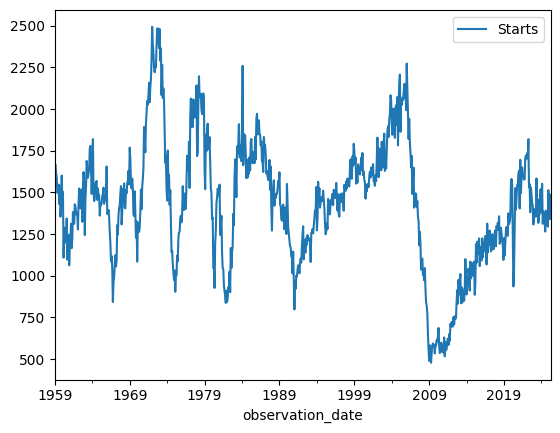

In [6]:
# 여기에 2, 3, 4번 문제에 대한 코드를 작성하세요.
df_housing.plot()
adf_test(df_housing)

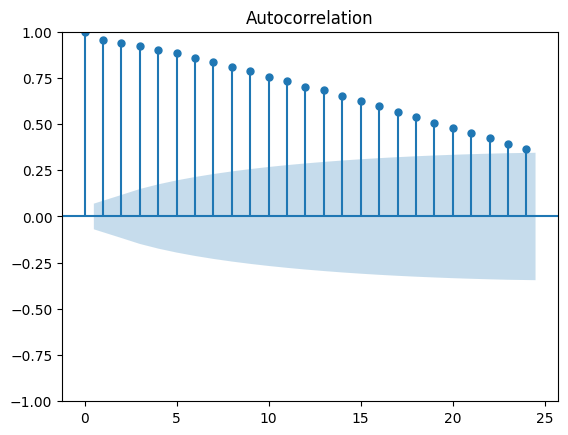

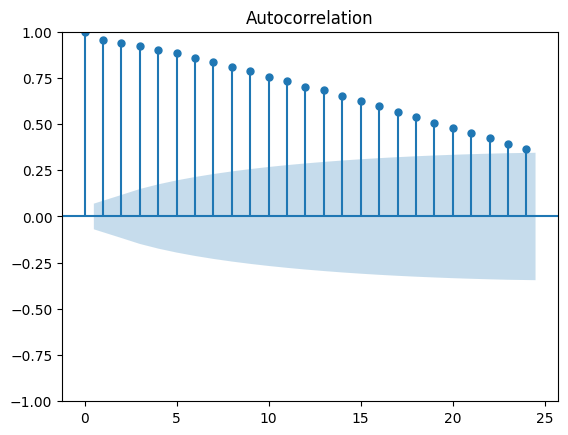

In [7]:
# ACF, PACF
plot_acf(df_housing, lags=24)

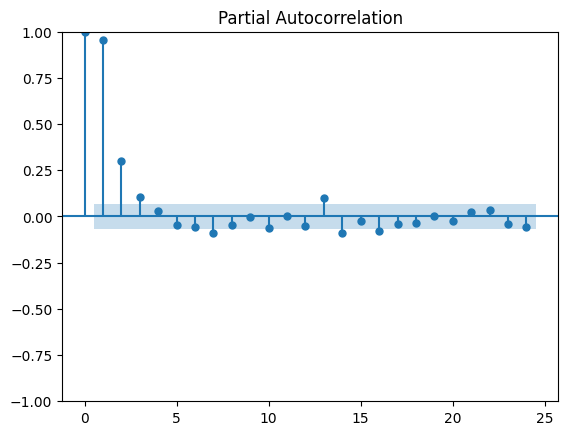

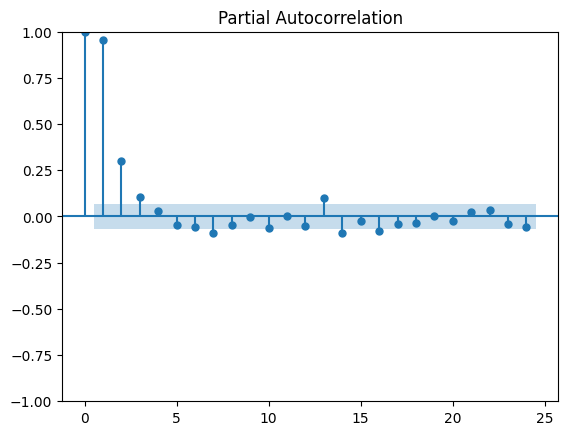

In [8]:
plot_pacf(df_housing, lags=24)

# ar2를 따른다
# 이동평균도 ma2로 해석

In [9]:
# p, d, q를 사용한 ARIMA 모델



* 잔차 검정에 대한 추가 지침 (학습 범위 외 참고 사항)
  1. 정규성 위반 (Jarque-Bera 검정 p=0.00):
     - 잔차가 정규분포를 따르지 않음을 의미
     - 모델이 극값(outlier)이나 비대칭적 패턴을 완전히 포착하지 못함
     - 신뢰구간과 예측구간의 정확도가 떨어질 수 있음
     - 통계적 추론(가설검정)의 신뢰성이 감소

  2. 등분산성 위반 (이분산성, H=0.66, p=0.00):
     - 잔차의 분산이 시간에 따라 일정하지 않음
     - 특정 시점에서 예측 오차가 더 크거나 작을 수 있음
     - 예측 불확실성이 시간에 따라 변함
     - 표준오차 추정이 부정확할 수 있음

  3. 실무적 영향:
     - 모델의 예측력 자체는 여전히 유용할 수 있음
     - 다만 예측구간의 신뢰도는 낮아짐
     - 더 복잡한 모델(GARCH, 비선형 모델 등) 고려 필요
     - 로그 변환이나 Box-Cox 변환으로 개선 가능

  4. 개선 방안:
     - 데이터 변환 (로그, 제곱근, Box-Cox)
     - 더 복잡한 모델 사용 (SARIMA, GARCH)
     - 이상치 제거 또는 처리
     - 추가 설명변수 포함 (ARIMAX)

## 별첨. pmdarima 라이브러리 소개

**pmdarima**는 Python에서 ARIMA 및 SARIMA 모델링을 위한 강력한 라이브러리입니다. R의 `forecast` 패키지에서 영감을 받아 개발되었으며, 시계열 분석을 보다 쉽고 효율적으로 수행할 수 있도록 도와줍니다.

### 주요 기능

1. **auto_arima**: 최적의 ARIMA/SARIMA 모델을 자동으로 탐색
   - 다양한 (p,d,q)(P,D,Q,s) 조합을 체계적으로 테스트
   - AIC, BIC 등의 정보 기준을 사용하여 최적 모델 선택
   - 계절성 자동 감지 및 처리

2. **정상성 검정**: 
   - KPSS, ADF 검정을 통한 차분 차수(d, D) 자동 결정
   - 데이터의 정상성 여부를 자동으로 판단

3. **계절성 처리**:
   - 계절성 패턴 자동 감지
   - 계절 차분 및 계절 ARIMA 파라미터 최적화

4. **모델 진단**:
   - 잔차 분석 도구 제공
   - 모델 적합도 평가 지표

In [12]:
!pip install pmdarima


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 💻 예시 코드 (Example Code)

-----

## 3\. 계절성을 고려한 시계열 분석 (Seasonal Analysis): SARIMA

### 💡 개념 (Concept)

현실의 많은 시계열 데이터는 **계절성(Seasonality)**, 즉 특정 기간(주, 월, 분기, 년 등)을 주기로 반복되는 패턴을 가집니다. **SARIMA(Seasonal ARIMA)** 모델은 기존 ARIMA 모델에 이러한 계절적 요인을 추가하여 예측 성능을 높인 모델입니다.

SARIMA 모델은 `ARIMA(p,d,q)`에 계절성 요소를 나타내는 `(P,D,Q,s)`가 추가됩니다.

  * **`s`**: 계절 주기를 의미합니다. (예: 월별 데이터면 `s=12`, 분기별 데이터면 `s=4`)
  * **`P`**: 계절성 자기회귀(Seasonal AR) 차수. `s` 기간 전의 과거 값이 현재 값에 미치는 영향을 나타냅니다.
  * **`D`**: 계절성 차분(Seasonal Differencing) 횟수. 계절성 패턴을 제거하기 위해 필요한 차분 횟수입니다.
  * **`Q`**: 계절성 이동평균(Seasonal MA) 차수. `s` 기간 전의 과거 예측 오차가 현재 값에 미치는 영향을 나타냅니다.

메타포: "올해 8월의 아이스크림 판매량은 작년 8월 판매량과 작년 예측 오차에 영향을 받을 것이다."

**Auto-ARIMA: 최적의 파라미터 자동 탐색**
SARIMA 모델은 `(p,d,q)(P,D,Q,s)`라는 7개의 파라미터를 결정해야 하므로, ACF/PACF만으로 최적의 조합을 찾기 어렵습니다. 이때 **`auto_arima`** 함수를 사용하면 매우 편리합니다. `auto_arima`는 주어진 데이터에 대해 다양한 파라미터 조합을 시도하고, **AIC(Akaike Information Criterion)** 값이 가장 낮은 최적의 모델을 자동으로 찾아줍니다.

### 💻 예시 코드 (Example Code)

`auto_arima`를 사용하여 월별 항공 승객 수 데이터에 대한 최적의 SARIMA 모델을 찾고, 예측을 수행해 보겠습니다.

In [ ]:
# pmdarima 라이브러리는 numpy 버전 2.0 이하에서 작동하여 넘파이를 재설치합니다.

In [ ]:
!pip install "numpy==1.26.4"

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import plotly.graph_objects as go
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# 데이터 로드
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=True)
df.columns = ['Passengers']

# 학습 데이터와 테스트 데이터 분리
train_auto, test_auto = train_test_split(df['Passengers'], train_size=len(df)-12)

# auto_arima로 최적 모델 탐색
# 계절 주기는 월별 데이터이므로 m=12로 설정합니다.
sarima_model = pm.auto_arima(train_auto,
                             start_p=1, start_q=1,
                             test='adf',       # adf 검정으로 d 결정
                             max_p=3, max_q=3,  # p, q 최대값
                             m=12,             # 계절 주기
                             d=None,           # d는 자동으로 찾도록 설정
                             seasonal=True,    # 계절성 모델 사용
                             start_P=0,
                             D=1,              # 계절성 차분은 1로 고정 (일반적)
                             trace=True,       # 모델 탐색 과정 출력
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)     # 최적 파라미터를 효율적으로 찾음

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=902.221, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.056 seconds
                                     SARIMAX Results                                      


#### auto_arima 결과 해석

1. 모델 탐색 과정
   - `auto_arima`는 다양한 SARIMA 모델을 시도하여 AIC(Akaike Information Criterion) 값이 가장 낮은 모델을 찾습니다
   - 총 12개의 모델을 시도했으며, 그 중 **ARIMA(1,1,0)(0,1,0)[12]** 모델이 AIC=899.902로 가장 좋은 성능을 보였습니다

2. 최적 모델: SARIMA(1,1,0)(0,1,0)[12]
   - **p=1, d=1, q=0**: 비계절성 부분에서 AR(1) 모델, 1차 차분 적용
   - **P=0, D=1, Q=0**: 계절성 부분에서는 1차 계절 차분만 적용
   - **계절 주기 = 12**: 월별 데이터의 연간 계절성

3. 모델 계수 해석
   - **ar.L1 = -0.2431**: AR(1) 계수로, 이전 시점의 값이 현재 값에 음의 영향을 미침
   - **sigma2 = 108.8757**: 오차항의 분산

4. 모델 진단
   - **Ljung-Box 검정 (Q=0.02, p=0.89)**: 잔차에 자기상관이 없음을 의미 (좋은 결과)
   - **Jarque-Bera 검정 (JB=0.57, p=0.75)**: 잔차가 정규분포를 따름을 의미 (좋은 결과)
   - **이분산성 검정 (H=1.47, p=0.23)**: 등분산성 가정을 만족함 (좋은 결과)

이 모델은 통계적으로 적절하며 항공 승객 데이터의 패턴을 잘 포착하고 있습니다.

In [11]:
# 테스트 데이터에 대한 예측
n_periods = 12
forecast_auto, conf_int = sarima_model.predict(n_periods=n_periods, return_conf_int=True)

# 예측 결과 시각화
forecast_index = pd.date_range(start=train_auto.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Passengers'], name='Actual'))
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_auto, name='Forecast'))

# 신뢰구간 추가
fig.add_trace(go.Scatter(x=forecast_index, y=conf_int[:, 0], fill='tonexty',
                         mode='lines', line_color='rgba(255,0,0,0.1)', name='Lower CI'))
fig.add_trace(go.Scatter(x=forecast_index, y=conf_int[:, 1], fill='tonexty',
                         mode='lines', line_color='rgba(255,0,0,0.1)', name='Upper CI'))

fig.update_layout(title='항공 승객 수 예측 (SARIMA with auto_arima)', xaxis_title='날짜', yaxis_title='승객 수')
fig.show()

### ✏️ 연습 문제 (Practice Problems)

1.  샴푸 판매량 데이터는 36개월간의 월별 판매량을 기록하고 있습니다. 이 데이터를 사용하여 SARIMA 모델을 구축해보세요.
      * 데이터셋 URL: `https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv`
2.  데이터에 계절성이 있는지 시각적으로 확인해보세요. (힌트: 12개월 주기로 패턴이 나타나는지 확인)
3.  `auto_arima`를 사용하여 최적의 SARIMA 모델을 찾고, 그 결과를 해석해보세요. (계절 주기는 12로 설정)
4.  마지막 6개월을 예측하고, 실제 데이터와 비교하여 모델의 성능을 시각적으로 평가해보세요.

<!-- end list -->

In [12]:
# 연습 문제 1, 2, 3, 4번 풀이 공간
import pandas as pd
import plotly.graph_objects as go
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# 1. 데이터 로드
url_shampoo = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df_shampoo = pd.read_csv(url_shampoo, index_col='Month', parse_dates=True)
df_shampoo.columns = ['Sales']


# 여기에 2, 3, 4번 문제에 대한 코드를 작성하세요.

-----

## 4\. 다변량 시계열 분석 (Multivariate Analysis): VAR

### 💡 개념 (Concept)

**VAR(Vector AutoRegression, 벡터 자기회귀)** 모델은 **여러 개의 시계열 변수**가 서로 영향을 주고받는 관계를 모델링하는 **다변량(Multivariate)** 시계열 분석 기법입니다.

단변량 분석(ARIMA 등)이 하나의 변수(y)의 과거만을 보고 미래를 예측했다면, VAR은 여러 변수(y1, y2, ...)의 과거 값들이 서로의 현재 값에 어떻게 영향을 미치는지를 동시에 분석합니다.

메타포: "오늘의 기온(y1)은 어제의 기온뿐만 아니라 어제의 풍속(y2)과 습도(y3)에도 영향을 받는다."

**VAR 모델의 특징**:

  * **내생성**: 모델에 포함된 모든 변수는 서로에게 영향을 주는 내생변수(endogenous variable)로 취급됩니다.
  * **방정식 시스템**: 각 변수에 대해 별도의 회귀 방정식이 만들어집니다. 예를 들어, 변수가 2개(y1, y2)인 VAR(1) 모델은 다음과 같은 두 개의 방정식으로 구성됩니다.
    $$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \epsilon_{1,t}$$
    $$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \epsilon_{2,t}$$
  * **정상성**: VAR 모델 역시 모든 시계열 데이터가 정상성을 만족해야 합니다. 따라서 모델링 전에 각 변수에 대해 ADF 검정 및 차분을 수행해야 합니다.
  * **최적 시차(p) 결정**: AIC, BIC 등의 정보 기준을 사용하여 최적의 시차 `p`를 결정합니다.

**VARMA, VARMAX 란?**

  * **VARMA**: VAR 모델에 이동평균(MA) 항을 추가하여, 각 변수의 예측 오차 또한 다른 변수들에게 영향을 미치는 관계를 모델링합니다.
  * **VARMAX**: VARMA 모델에 외생변수(eXogenous variable, X)를 추가한 모델입니다. 모델 외부에서 결정되지만 모델 내 변수들에게 영향을 주는 변수(예: 정책, 이벤트)를 분석에 포함시킬 수 있습니다.

### 💻 예시 코드 (Example Code)

`moneystock-spending-series.csv` 데이터의 'Money'와 'Spending' 두 변수가 서로에게 미치는 영향을 VAR 모델로 분석해 보겠습니다.

In [13]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# 데이터 로드 및 2차 차분 (정상성 확보)
df_money = pd.read_csv('../datasets/tsa/moneystock-spending-series.csv', index_col=0, parse_dates=True)
df_money.index.freq = 'MS'
df_diff2 = df_money.diff().diff().dropna()

# 학습 데이터와 테스트 데이터 분리
nobs = 12 # 마지막 12개를 테스트 데이터로 사용
train_var = df_diff2[:-nobs]
test_var = df_diff2[-nobs:]

# 1. 최적의 시차 p 찾기
model_var = VAR(train_var)
lag_selection_results = model_var.select_order(maxlags=15)
print(lag_selection_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.84       14.87   2.789e+06       14.85
1        14.26       14.36   1.567e+06       14.30
2        14.04       14.20   1.255e+06       14.10
3        13.93      14.15*   1.123e+06       14.02
4        13.91       14.18   1.096e+06       14.02
5        13.87       14.20   1.052e+06      14.00*
6        13.87       14.27   1.058e+06       14.03
7        13.86       14.32   1.048e+06       14.05
8       13.81*       14.33  9.920e+05*       14.02
9        13.82       14.40   1.006e+06       14.05
10       13.85       14.49   1.037e+06       14.11
11       13.89       14.59   1.074e+06       14.17
12       13.91       14.68   1.105e+06       14.22
13       13.91       14.73   1.101e+06       14.24
14       13.94       14.83   1.137e+06       14.30
15       13.92       14.87   1.117e+06       14.31
-------------------------------

In [14]:
# AIC 기준 최적 시차는 8로 나타남 (AIC: 13.81*)
# 2. VAR(8) 모델 구축 및 학습
model_fitted = model_var.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Jun, 2025
Time:                     17:06:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.2554
Nobs:                     230.000    HQIC:                   13.9522
Log likelihood:          -2199.64    FPE:                    934476.
AIC:                      13.7472    Det(Omega_mle):         810270.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.920234         1.774714            0.519           0.604
L1.Money           -0.711320         0.070127          -10.143           0.000
L1.Spending        -0.130975         0.053364           -2.454      

In [15]:
# 3. 예측
lag_order = model_fitted.k_ar
forecast_input = train_var.values[-lag_order:]
forecast_var = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(forecast_var, index=test_var.index, columns=train_var.columns + '_2d')
df_forecast.head(10)


,Money_2d,Spending_2d
Date,,
2015-01-01,-11.394798,38.520197
2015-02-01,-1.207837,-14.664302
2015-03-01,0.742118,-2.075852
2015-04-01,-9.283600,5.075886
2015-05-01,5.031139,9.066290
2015-06-01,-7.084891,-8.189636
2015-07-01,3.380938,8.433085
2015-08-01,-0.404858,-3.408926
2015-09-01,1.157634,-8.166147


In [16]:
# 차분 복원 과정 상세 설명

## 2차 차분된 데이터를 원본으로 복원하는 과정

### 1단계: 1차 차분 복원
# 2차 차분: Y''(t) = Y'(t) - Y'(t-1)
# 따라서 Y'(t) = Y'(t-1) + Y''(t)
# 
# 마지막 1차 차분값: Y'(T) = Y(T) - Y(T-1)
# 예측된 1차 차분값들:
# Y'(T+1) = Y'(T) + Y''(T+1)
# Y'(T+2) = Y'(T+1) + Y''(T+2) = Y'(T) + Y''(T+1) + Y''(T+2)
# ...
# 즉, Y'(T+h) = Y'(T) + Σ(Y''(T+i)) for i=1 to h

print("=== 1차 차분 복원 과정 ===")
print("원본 데이터의 마지막 두 값:")
print(f"Money(T-1): {df_money['Money'].iloc[-2]:.2f}")
print(f"Money(T): {df_money['Money'].iloc[-1]:.2f}")
print(f"마지막 1차 차분값: {df_money['Money'].iloc[-1] - df_money['Money'].iloc[-2]:.2f}")
print()

print("2차 차분 예측값들:")
for i in range(3):
    print(f"Money_2d[{i+1}]: {df_forecast['Money_2d'].iloc[i]:.2f}")
print()

print("1차 차분 복원 결과:")
last_diff = df_money['Money'].iloc[-1] - df_money['Money'].iloc[-2]
cumsum_2d = df_forecast['Money_2d'].cumsum()
for i in range(3):
    restored_1d = last_diff + cumsum_2d.iloc[i]
    print(f"Money_1d[{i+1}]: {last_diff:.2f} + {cumsum_2d.iloc[i]:.2f} = {restored_1d:.2f}")

=== 1차 차분 복원 과정 ===
원본 데이터의 마지막 두 값:
Money(T-1): 12277.40
Money(T): 12335.90
마지막 1차 차분값: 58.50

2차 차분 예측값들:
Money_2d[1]: -11.39
Money_2d[2]: -1.21
Money_2d[3]: 0.74

1차 차분 복원 결과:
Money_1d[1]: 58.50 + -11.39 = 47.11
Money_1d[2]: 58.50 + -12.60 = 45.90
Money_1d[3]: 58.50 + -11.86 = 46.64


In [17]:
### 2단계: 원본 값 복원
# 1차 차분: Y'(t) = Y(t) - Y(t-1)
# 따라서 Y(t) = Y(t-1) + Y'(t)
#
# 마지막 원본값: Y(T)
# 예측된 원본값들:
# Y(T+1) = Y(T) + Y'(T+1)
# Y(T+2) = Y(T+1) + Y'(T+2) = Y(T) + Y'(T+1) + Y'(T+2)
# ...
# 즉, Y(T+h) = Y(T) + Σ(Y'(T+i)) for i=1 to h

print("\n=== 원본 값 복원 과정 ===")
print(f"마지막 원본값: {df_money['Money'].iloc[-1]:.2f}")
print()

print("복원된 1차 차분값들:")
for i in range(3):
    print(f"Money_1d[{i+1}]: {df_results['Money_1d'].iloc[i]:.2f}")
print()

print("원본 값 복원 결과:")
last_value = df_money['Money'].iloc[-1]
cumsum_1d = df_results['Money_1d'].cumsum()
for i in range(3):
    restored_original = last_value + cumsum_1d.iloc[i]
    print(f"Money_forecast[{i+1}]: {last_value:.2f} + {cumsum_1d.iloc[i]:.2f} = {restored_original:.2f}")

print("\n=== 수식 정리 ===")
print("2차 차분 → 1차 차분: Y'(T+h) = Y'(T) + Σ(Y''(T+i)) for i=1 to h")
print("1차 차분 → 원본값: Y(T+h) = Y(T) + Σ(Y'(T+i)) for i=1 to h")
print("여기서 Σ는 누적합(cumsum)을 의미합니다.")



=== 원본 값 복원 과정 ===
마지막 원본값: 12335.90

복원된 1차 차분값들:


NameError: name 'df_results' is not defined

In [ ]:
# 4. 예측 결과 역변환 (Invert Differencing)
def invert_transformation(df_train, df_forecast, second_diff=False):
    """차분된 예측값을 원본 스케일로 복원합니다."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # 1차 차분 복원
        df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1] - df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # 2차 차분 복원
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_money[['Money', 'Spending']], df_forecast)
df_results.head(10)


In [ ]:
# 5. 결과 시각화
fig = go.Figure()
# Money 변수
fig.add_trace(go.Scatter(x=df_money.index, y=df_money['Money'], name='Money Actual'))
fig.add_trace(go.Scatter(x=df_results.index, y=df_results['Money_forecast'], name='Money Forecast', line=dict(dash='dot')))
# Spending 변수
fig.add_trace(go.Scatter(x=df_money.index, y=df_money['Spending'], name='Spending Actual'))
fig.add_trace(go.Scatter(x=df_results.index, y=df_results['Spending_forecast'], name='Spending Forecast', line=dict(dash='dot')))

fig.update_layout(title='M2 통화량 및 개인 소비 지출 예측 (VAR)', xaxis_title='날짜')
fig.show()

### ✏️ 연습 문제 (Practice Problems)

1.  미국의 거시경제 데이터(고용, 생산성, 실업률, 인구)를 사용하여 VAR 모델을 구축해보세요.
      * 데이터셋 URL: `https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/macrodata/macrodata.csv`
      * 데이터셋은 분기별 데이터입니다. 'year'와 'quarter' 열을 조합하여 시계열 인덱스를 만드세요.
2.  모델에 사용할 변수('realgdp', 'realcons', 'unemp', 'pop')를 선택하고, 각 변수의 정상성을 확인한 후 필요하다면 차분을 적용하세요.
3.  `select_order()`를 사용하여 최적의 시차(lag)를 결정하세요.
4.  결정된 시차로 VAR 모델을 학습하고, 향후 8분기(2년)를 예측해보세요. 예측 결과를 역변환하여 원본 스케일로 만들고, 그래프로 시각화하여 실제 데이터의 추세와 비교해보세요.

In [ ]:
# 연습 문제 1, 2, 3, 4번 풀이 공간
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 1. 데이터 로드 및 인덱스 설정
url_macro = 'https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/macrodata/macrodata.csv'
df_macro = pd.read_csv(url_macro)

# year와 quarter를 조합하여 시계열 인덱스 생성
df_macro['date'] = pd.to_datetime(df_macro['year'].astype(str) + '-Q' + df_macro['quarter'].astype(str))
df_macro.set_index('date', inplace=True)
print("데이터 형태:", df_macro.shape)
print("첫 5행:")
df_macro.head()

# 여기에 코드를 작성하여 시계열 인덱스를 생성하세요.


# 2. 변수 선택 및 정상성 확인/차분
# 여기에 코드를 작성하세요.


# 3. 최적 시차 결정
# 여기에 코드를 작성하세요.


# 4. 모델링, 예측, 역변환 및 시각화
# 여기에 코드를 작성하세요.